# Beispiel zum Thema Fixpoint-Quantisierung #

Demonstriere:
- Quantisierungskennlinie
- Wellenform eines quantisierten Signals

bei verschiedenen Arten der Quantisierung und der Sättigung

(c) 2016 Christian Münker - Files zur Vorlesung "DSV auf FPGAs"

In [3]:
from __future__ import print_function, division
import os, sys
import time

module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
import dsp_fpga_lib as dsp # import and set plot properties
import dsp_fpga_fix_lib as fx

import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

# plt.style.use('../script.mplstyle')
import numpy as np
from numpy import sin, cos, tan, angle, pi, array, arange, log10, zeros, \
  linspace, ones, sqrt

plt.rcParams["figure.figsize"] = [9, 5]

Anzahl der Überläufe =  5000
Total CPU time: 1.171 ms


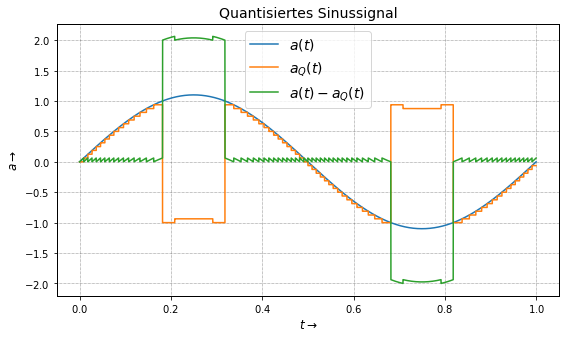

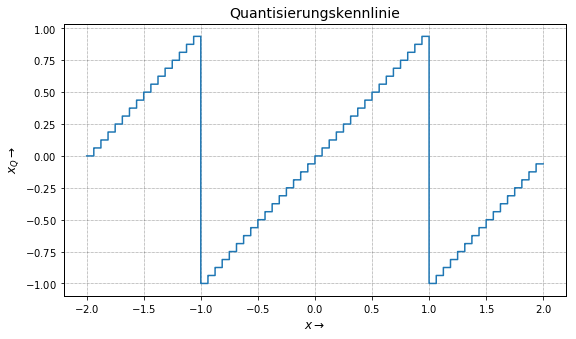

In [4]:
N = 10000; f_a = 1
t = linspace(0, 1, N, endpoint=False)
a = 1.1 * sin(2 * pi * f_a * t)
x = linspace(-2, 2, N, endpoint=False) 
#
#q_obj = (0, 4, 'round', 'sat') # try 'round' ; 'sat'
q_obj = {'QI':0, 'QF': 4, 'quant':'floor', 'ovfl': 'wrap'} # try 'round' ; 'sat'
#q_obj = {'OVFL':'sat'}
fx_a = fx.Fixed(q_obj)
fx_x = fx.Fixed(q_obj)

t_cpu = time.clock()

aq = fx_a.fix(a) # quantize a
xq = fx_x.fix(x) # quantize x
print('Anzahl der Überläufe = ', fx_x.N_over) 
print ('Total CPU time: %.5g ms' %((time.clock()-t_cpu)*1000))
#
plt.figure(1)
plt.title('Quantisiertes Sinussignal')
plt.plot(t, a, label = r'$a(t)$')
plt.step(t, aq, where = 'post', label = r'$a_Q(t)$')
plt.plot(t, a-aq, label = r'$a(t) - a_Q(t)$')
plt.legend(fontsize = 14)
plt.grid(True)
plt.xlabel(r'$t \rightarrow$'); plt.ylabel(r'$a \rightarrow$')
#
plt.figure(2)
plt.title('Quantisierungskennlinie')
plt.step(x,xq, where = 'post')
plt.xlabel(r'$x \rightarrow$'); plt.ylabel(r'$x_Q \rightarrow$')
plt.show()

<hr>
**Copyright**

(c) 2016 - 2018 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2018*.